In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

visualization styles

In [2]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

print("Libraries imported successfully.")

Libraries imported successfully.


Load the dataset

In [3]:
try:
    # Make sure the path points to your raw data file
    df = pd.read_csv('../data/raw/PS_20174392719_1491204439457_log.csv')
    print("Dataset loaded successfully.")
    print(f"Dataset shape: {df.shape}")
except FileNotFoundError:
    print("Error: Dataset file not found. Make sure it's in the 'ml/data/raw/' directory.")

Dataset loaded successfully.
Dataset shape: (6362620, 11)


Initial Data Overview

In [4]:
print("First 5 rows of the dataset:")
display(df.head())

# Display data types and non-null counts
print("\nDataset Info:")
df.info()

# Display summary statistics for numerical columns
print("\nSummary Statistics:")
display(df.describe())


First 5 rows of the dataset:


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB

Summary Statistics:


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Check for missing values in each column

In [5]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

if missing_values.sum() == 0:
    print("\nGreat! No missing values found in the dataset.")
else:
    print("\nWarning: Missing values detected. These will need to be handled.")

Missing values per column:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Great! No missing values found in the dataset.


Analyze Class Distribution (Fraud vs. Non-Fraud)

Fraud vs. Non-Fraud Distribution:
isFraud
0    6354407
1       8213
Name: count, dtype: int64

Percentage of Fraudulent Transactions: 0.1291%


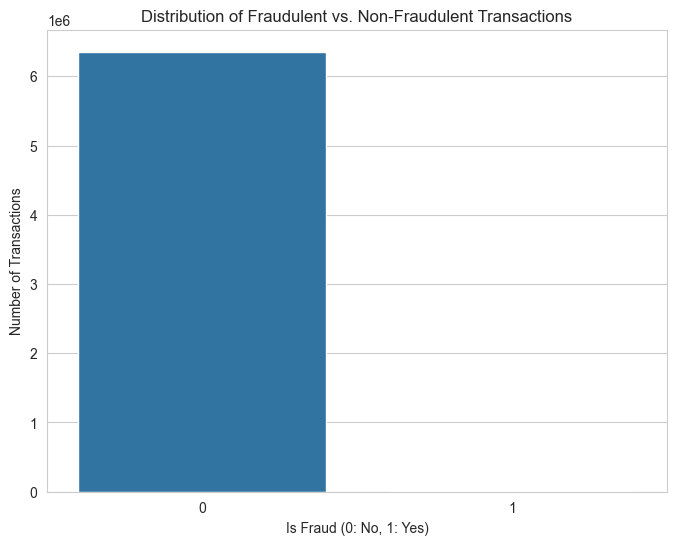

In [6]:
fraud_counts = df['isFraud'].value_counts()
fraud_percentage = df['isFraud'].value_counts(normalize=True) * 100

print("Fraud vs. Non-Fraud Distribution:")
print(fraud_counts)
print(f"\nPercentage of Fraudulent Transactions: {fraud_percentage[1]:.4f}%")

# Visualize the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='isFraud', data=df)
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Is Fraud (0: No, 1: Yes)')
plt.ylabel('Number of Transactions')
plt.show()


Explore Transaction Types 

Transaction Types Distribution:
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


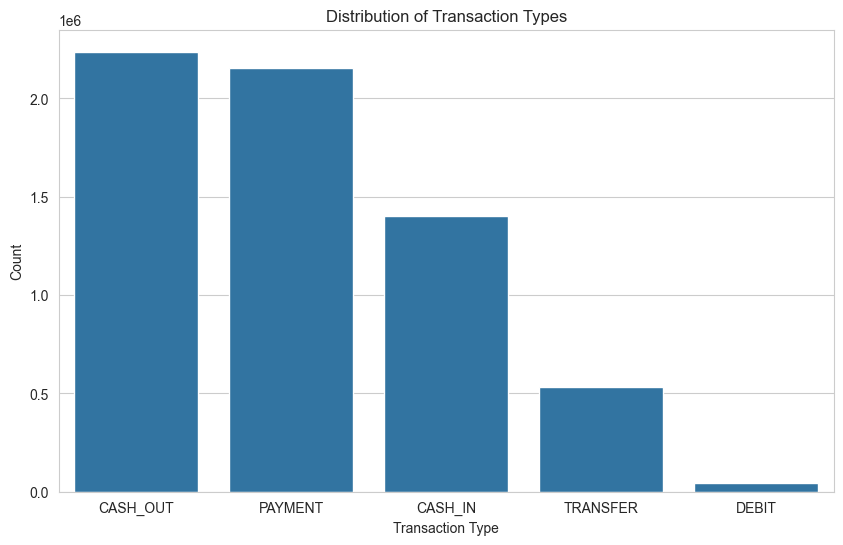


Number of Fraudulent Transactions by Type:
type
CASH_IN        0
CASH_OUT    4116
DEBIT          0
PAYMENT        0
TRANSFER    4097
Name: isFraud, dtype: int64


In [7]:
print("Transaction Types Distribution:")
print(df['type'].value_counts())

# Visualize transaction types
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df, order=df['type'].value_counts().index)
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

# Analyze fraud by transaction type
fraud_by_type = df.groupby('type')['isFraud'].sum()
print("\nNumber of Fraudulent Transactions by Type:")
print(fraud_by_type)

Explore Numerical Features

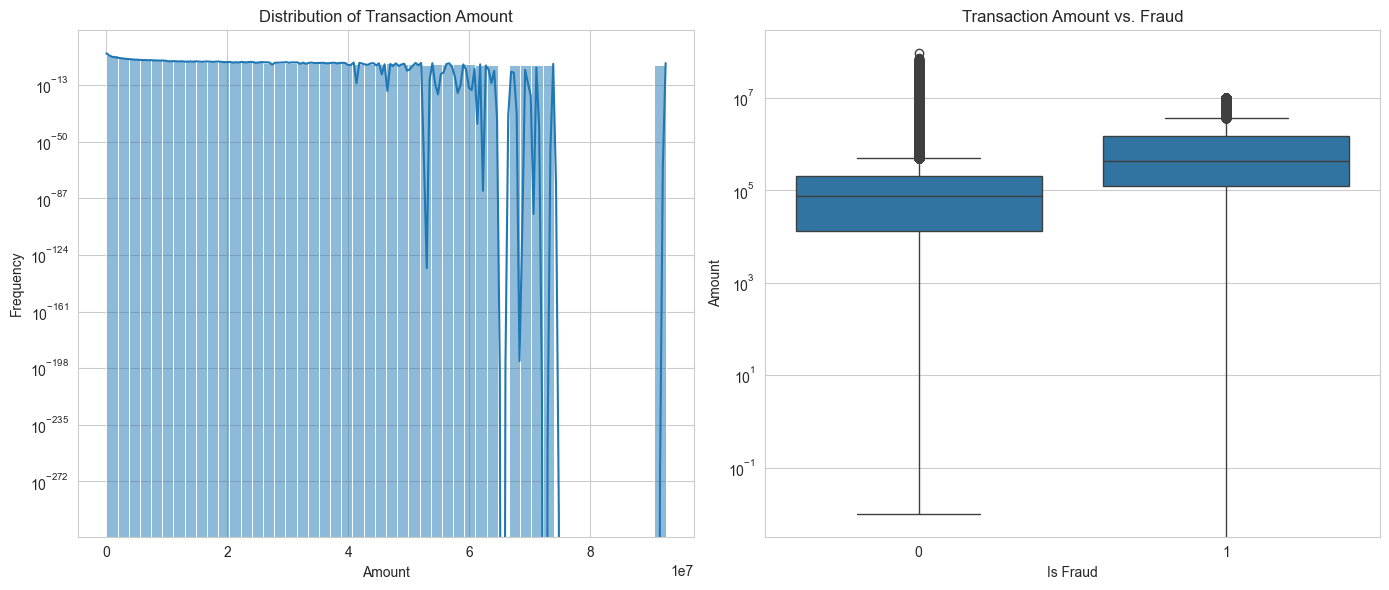

Observations on 'amount':
            amount                                                           \
             count          mean           std   min         25%        50%   
isFraud                                                                       
0        6354407.0  1.781970e+05  5.962370e+05  0.01   13368.395   74684.72   
1           8213.0  1.467967e+06  2.404253e+06  0.00  127091.330  441423.44   

                                  
                75%          max  
isFraud                           
0         208364.76  92445516.64  
1        1517771.48  10000000.00  


In [8]:
# Analyze the 'amount' column
plt.figure(figsize=(14, 6))

# Distribution of transaction amounts
plt.subplot(1, 2, 1)
sns.histplot(df['amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.yscale('log') # Use log scale due to high skew

# Boxplot of transaction amounts for fraud vs. non-fraud
plt.subplot(1, 2, 2)
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title('Transaction Amount vs. Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Amount')
plt.yscale('log')

plt.tight_layout()
plt.show()

print("Observations on 'amount':")
print(df[['amount', 'isFraud']].groupby('isFraud').describe())



 Correlation Analysis

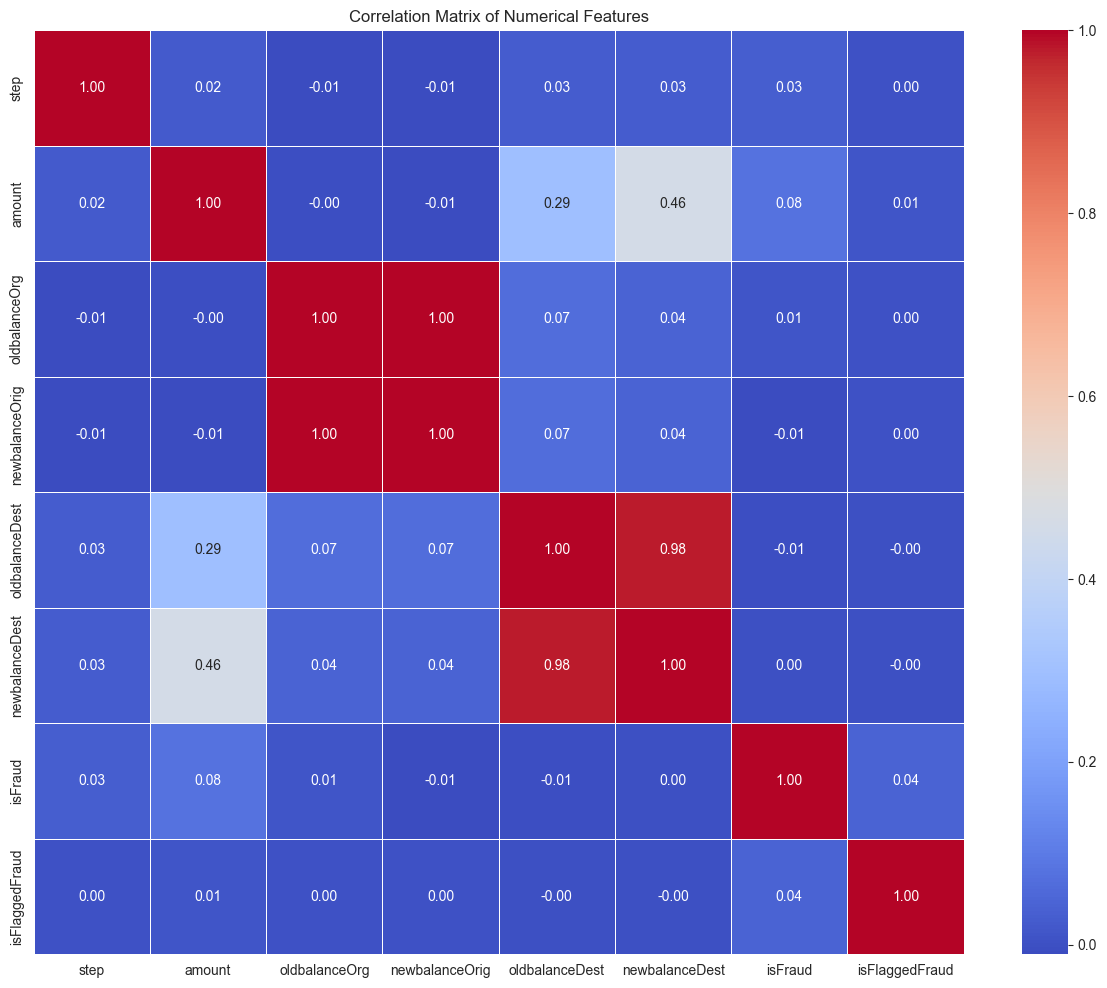

In [9]:
# Select only numerical columns for correlation matrix
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()
